In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def recover_loss_acc(infile):
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    val_iou = []
    for l in infile:
        if 'Train - ' in l:
            split_train = l.split(' ')
            train_loss.append( float(split_train[3].split(',')[0]) )

            train_acc.append( float(split_train[5]) )
        if 'Val - ' in l:
            split_val = l.split(' ')
            val_loss.append( float(split_val[3]) )
            val_acc.append( float(split_val[6]) )
            val_iou.append( float(split_val[9]) )
            
    return {'train_loss': train_loss,
           'train_acc': train_acc,
           'val_loss': val_loss,
           'val_acc': val_acc,
           'val_iou': val_iou}

In [3]:
with open('/Users/wesleymaddox/Desktop/ninetales/Desktop/nfs01_tesla/swa_uncertainties/segmentation/segment_0111_sgd_1e-2_w_d/log.out') as f:
    lines = f.readlines()
drop2d = [l.rstrip('\n') for l in lines]

In [15]:
drop2d_dict = recover_loss_acc(drop2d)


(0.1, 0.35)

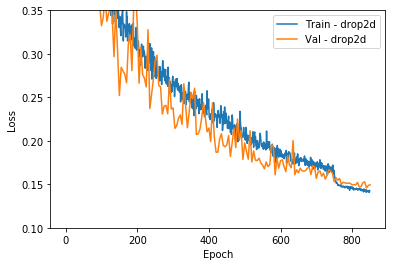

In [17]:
plt.plot(drop2d_dict['train_loss'], label='Train - drop2d')
plt.plot(range(5,855,5), drop2d_dict['val_loss'], label='Val - drop2d')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim((0.1, 0.35))

Text(0,0.5,'Accuracy')

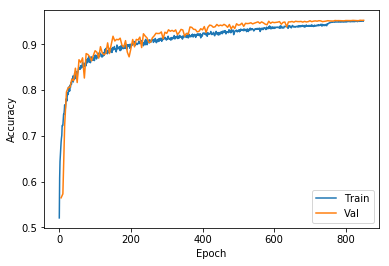

In [7]:
plt.plot(train_acc, label='Train')
plt.plot(range(5,855,5), val_acc, label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0,0.5,'Val mIOU')

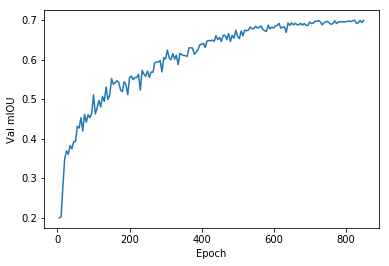

In [8]:
plt.plot(range(5, 855, 5), val_iou)
plt.xlabel('Epoch')
plt.ylabel('Val mIOU')

In [18]:
with open('/Users/wesleymaddox/Desktop/ninetales/Desktop/nfs01_tesla/swa_uncertainties/segmentation/segment_0114_sgd_1e-2_short_drop1d//log.out') as f:
    lines = f.readlines()
drop1d = [l.rstrip('\n') for l in lines]
drop1d_dict = recover_loss_acc(drop1d)

(0.1, 0.35)

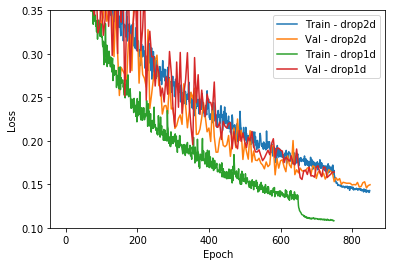

In [21]:
plt.plot(drop2d_dict['train_loss'], label='Train - drop2d')
plt.plot(range(5,855,5), drop2d_dict['val_loss'], label='Val - drop2d')

plt.plot(drop1d_dict['train_loss'], label='Train - drop1d')
plt.plot(range(5,755,5), drop1d_dict['val_loss'], label='Val - drop1d')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim((0.1, 0.35))

In [20]:
len(drop1d_dict['train_loss'])

750

(0.8, 1.0)

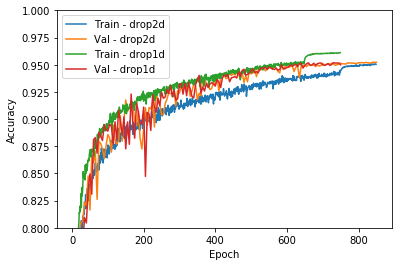

In [25]:
plt.plot(drop2d_dict['train_acc'], label='Train - drop2d')
plt.plot(range(5,855,5), drop2d_dict['val_acc'], label='Val - drop2d')

plt.plot(drop1d_dict['train_acc'], label='Train - drop1d')
plt.plot(range(5,755,5), drop1d_dict['val_acc'], label='Val - drop1d')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim((0.8,1.0))